In [51]:
import pandas as pd
import matplotlib.pyplot as plt

Read customers data

In [2]:
customers = pd.read_csv('music store data/customer.csv')
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     59 non-null     int64 
 1   first_name      59 non-null     object
 2   last_name       59 non-null     object
 3   company         10 non-null     object
 4   address         59 non-null     object
 5   city            59 non-null     object
 6   state           30 non-null     object
 7   country         59 non-null     object
 8   postal_code     55 non-null     object
 9   phone           58 non-null     object
 10  fax             12 non-null     object
 11  email           59 non-null     object
 12  support_rep_id  59 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.1+ KB


clean the customers data

In [3]:
# drop empty cells of postal code and phone, since they are few rows
customers.dropna(subset=['postal_code', 'phone'], inplace=True)
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 58
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     54 non-null     int64 
 1   first_name      54 non-null     object
 2   last_name       54 non-null     object
 3   company         10 non-null     object
 4   address         54 non-null     object
 5   city            54 non-null     object
 6   state           29 non-null     object
 7   country         54 non-null     object
 8   postal_code     54 non-null     object
 9   phone           54 non-null     object
 10  fax             12 non-null     object
 11  email           54 non-null     object
 12  support_rep_id  54 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 5.9+ KB


In [4]:
# fill empty values for company, state and fax
customers.fillna({'state':'no state specified', 'fax':'no fax specified', 'company':'no company specified'}, inplace=True)
customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 0 to 58
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     54 non-null     int64 
 1   first_name      54 non-null     object
 2   last_name       54 non-null     object
 3   company         54 non-null     object
 4   address         54 non-null     object
 5   city            54 non-null     object
 6   state           54 non-null     object
 7   country         54 non-null     object
 8   postal_code     54 non-null     object
 9   phone           54 non-null     object
 10  fax             54 non-null     object
 11  email           54 non-null     object
 12  support_rep_id  54 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 5.9+ KB


# 1- ​Which country has the most customers?

In [5]:
# group by the country
customers_grouped_by_country = customers.groupby(by='country')
# get the size of each group
country_list = customers_grouped_by_country.size()
# get the index of the max value
most_country = country_list.idxmax()
# get max value
country_value = country_list.max()
print(f"The country with most customers is {most_country} with {country_value} customers")

The country with most customers is USA with 13 customers


Read invoice data

In [6]:
invoices = pd.read_csv('music store data/invoice.csv')
invoices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   invoice_id           614 non-null    int64  
 1   customer_id          614 non-null    int64  
 2   invoice_date         614 non-null    object 
 3   billing_address      614 non-null    object 
 4   billing_city         614 non-null    object 
 5   billing_state        310 non-null    object 
 6   billing_country      614 non-null    object 
 7   billing_postal_code  559 non-null    object 
 8   total                614 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 43.3+ KB


clean invoice data

In [7]:
# remove empty cells for billing_postal_code
invoices.dropna(subset=['billing_postal_code'], inplace=True)
invoices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 613
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   invoice_id           559 non-null    int64  
 1   customer_id          559 non-null    int64  
 2   invoice_date         559 non-null    object 
 3   billing_address      559 non-null    object 
 4   billing_city         559 non-null    object 
 5   billing_state        297 non-null    object 
 6   billing_country      559 non-null    object 
 7   billing_postal_code  559 non-null    object 
 8   total                559 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 43.7+ KB


In [8]:
# fill empty cells for billing_state with a value
invoices.fillna({'billing_state':'Not specified'}, inplace=True)
invoices.info()

<class 'pandas.core.frame.DataFrame'>
Index: 559 entries, 0 to 613
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   invoice_id           559 non-null    int64  
 1   customer_id          559 non-null    int64  
 2   invoice_date         559 non-null    object 
 3   billing_address      559 non-null    object 
 4   billing_city         559 non-null    object 
 5   billing_state        559 non-null    object 
 6   billing_country      559 non-null    object 
 7   billing_postal_code  559 non-null    object 
 8   total                559 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 43.7+ KB


# 2- ​Which customer has spent the most money?

In [ ]:
# group by the customer_id column and select the total column to apply aggregation on
totals_foreach_customer = invoices.groupby(by='customer_id')['total']
# apply summation on the total column for each customer
sum_of_totals = totals_foreach_customer.sum()
# sum_of_totals.sort_values(ascending=False)

# get the customer_id with max total
max_customer_id = sum_of_totals.idxmax()
print(f"Customer id with the most money spent is {max_customer_id}")
# get the date for customer with most money spent
customers.loc[customers['customer_id'] == 5]


Customer id with the most money spent is 5


,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,no state specified,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


Read invoice_line data

In [10]:
invoice_line = pd.read_csv("music store data/invoice_line.csv")
invoice_line.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4757 entries, 0 to 4756
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   invoice_line_id  4757 non-null   int64  
 1   invoice_id       4757 non-null   int64  
 2   track_id         4757 non-null   int64  
 3   unit_price       4757 non-null   float64
 4   quantity         4757 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 185.9 KB


Read track data

In [11]:
tracks = pd.read_csv("music store data/track.csv")
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_id       3503 non-null   int64  
 1   name           3503 non-null   object 
 2   album_id       3503 non-null   int64  
 3   media_type_id  3503 non-null   int64  
 4   genre_id       3503 non-null   int64  
 5   composer       2525 non-null   object 
 6   milliseconds   3503 non-null   int64  
 7   bytes          3503 non-null   int64  
 8   unit_price     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


clean tracks data

In [12]:
# replace empty cells in composer with any value
tracks.fillna({'composer':'no composer'}, inplace=True)
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   track_id       3503 non-null   int64  
 1   name           3503 non-null   object 
 2   album_id       3503 non-null   int64  
 3   media_type_id  3503 non-null   int64  
 4   genre_id       3503 non-null   int64  
 5   composer       3503 non-null   object 
 6   milliseconds   3503 non-null   int64  
 7   bytes          3503 non-null   int64  
 8   unit_price     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


Read genre data

In [13]:
genres = pd.read_csv("music store data/genre.csv")
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genre_id  25 non-null     int64 
 1   name      25 non-null     object
dtypes: int64(1), object(1)
memory usage: 532.0+ bytes


# 3- How much revenue was generated from each music genre?

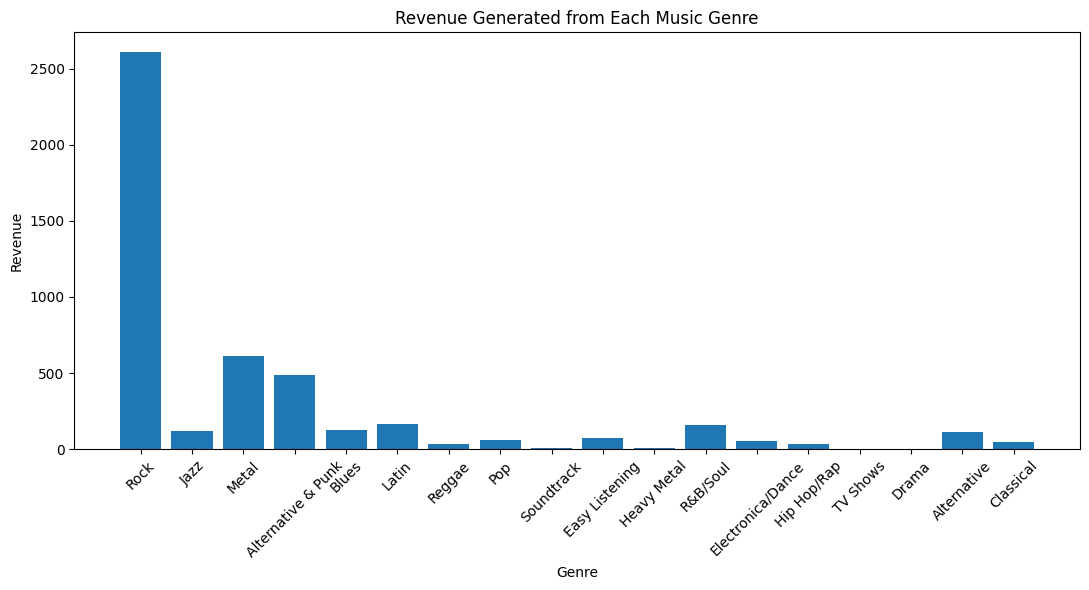

In [58]:
# merge invoice_line and tracks to know the revenue for each track
merged_invoiceLine_genre = pd.merge(invoice_line, tracks, how='inner', on='track_id')
# select the required columns only 
required_cols = merged_invoiceLine_genre.loc[:, ['track_id', 'unit_price_x', 'quantity', 'genre_id']]
# add a column that calculates the total price for each track sold
required_cols['price'] = required_cols['unit_price_x'] * required_cols['quantity']
# required_cols

# group the data by the genre id
required_cols_groupedby_genre = required_cols.groupby(by='genre_id')
# required_cols_groupedby_genre.size()

# aggregate the price column to get the total revenue for each genre
revenue_foreach_genre = required_cols_groupedby_genre['price'].sum()
# revenue_foreach_genre

# convert the series result to a dataframe and reset index(reset index is needed since the series containes only 1 col which is price)
revenue_df = revenue_foreach_genre.reset_index()
revenue_df.columns = ['genre_id', 'revenue']
# revenue_df

# merge results with genre table to get data for each genre
results_merged_genre = pd.merge(genres, revenue_df, how='inner', on='genre_id')
results_merged_genre

plt.figure(figsize=(11,6))
plt.bar(results_merged_genre['name'], results_merged_genre['revenue'])
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Revenue Generated from Each Music Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ​What is the average transaction value per customer?

In [61]:
# group invoce data by customer_id to get the avg/mean of total/transaction value for all invoices for each customer
grouped_data = invoices.groupby(by='customer_id')
avg_total_foreach_customer = grouped_data['total'].mean()
# avg_total_foreach_customer

# convert the result to a dataframe
avg_total_df = avg_total_foreach_customer.reset_index()
avg_total_df.columns = ['customer_id', 'avg_total']
# avg_total_df

# merge with customers data 
merged_avgtotal_customer = pd.merge(customers, avg_total_df, how='inner', on='customer_id')
result_customer_avgtotal = merged_avgtotal_customer.loc[:, ['customer_id', 'first_name', 'last_name', 'avg_total']]
result_customer_avgtotal

# plt.figure(figsize=(12,6))
# plt.bar(result_customer_avgtotal['first_name'], result_customer_avgtotal['avg_total'])
# plt.xlabel('Customer First Name')
# plt.ylabel('Avg total')
# plt.title('Average transaction value per customer.')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

,customer_id,first_name,last_name,avg_total
0,1,Luís,Gonçalves,8.376923
1,2,Leonie,Köhler,7.470000
2,3,François,Tremblay,11.110000
3,4,Bjørn,Hansen,8.030000
4,5,František,Wichterlová,8.030000
5,6,Helena,Holý,10.725000
6,7,Astrid,Gruber,7.700000
7,8,Daan,Peeters,8.627143
8,9,Kara,Nielsen,3.762000
9,10,Eduardo,Martins,5.032500


# ​What is the total revenue for each year?

In [64]:
# change the invoice_date to datetime to be able to extract the year
invoices['invoice_date'] = pd.to_datetime(invoices['invoice_date'])
# invoices.info()

# get the years of the invoice_date
years = invoices['invoice_date'].dt.year
# group by the years
invoices_groupedby_year = invoices.groupby(by=years)
# invoices_groupedby_year.size()

# aggregate the total solumn to get total revenue in each yaer
sum_total_by_year = invoices_groupedby_year['total'].sum()
# sum_total_by_year

# change the result into a dataframe
total_revenue_by_year_df = sum_total_by_year.reset_index()
total_revenue_by_year_df.columns = ['year', 'total revenue']
total_revenue_by_year_df

# plt.figure(figsize=(10,6))
# plt.bar(total_revenue_by_year_df['year'], total_revenue_by_year_df['total revenue'])
# plt.xlabel('Year')
# plt.ylabel('Total Revenue')
# plt.title('Total Revenue for each year.')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

,year,total revenue
0,2017,1114.74
1,2018,1043.46
2,2019,1096.92
3,2020,1057.32
